<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT PRICE PREDICTION
    </h2>
    </div>

In this project, i am going to analyse and explore a dataset obtained from EaseMyTrip website and to conduct various statistical hypothesis tests in order to get meaningful information from it and then generate a machine learning model to predict price of flight tickets.

### Importing all the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Loading the dataset in CSV file

In [2]:
p = pd.read_csv('CD.csv')
p

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Checking shape of dataframe

There are 300153 rows and 12 columns

In [3]:
p.shape

(300153, 12)

### Quick Information about the Data

In [4]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Stastical Description of Data

In [5]:
p.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Displaying all column names

In [6]:
p.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        Data Preprocessing
    </h2>
    </div>

### Null values percentage of each columns

There are no null values

In [7]:
nullv=p.isnull().sum()
nullv

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Removing 'index' and ‘flight’ columns

These columns are irrelevant for our prediction because they have none or neglegible correlation with price fluctuation

In [8]:
p = p.drop(['index', 'flight'],axis=1)


### Checking if both the columns are removed successfully

In [9]:
p

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Checking number of duplicate rows

Duplicates are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting, So we remove them.

In [10]:
no_of_duplicate_row=p.duplicated().sum()
print(f'Number of duplicate rows: {no_of_duplicate_row}')

Number of duplicate rows: 2213


### Removing all duplicate rows

In [11]:
p.drop_duplicates(keep=False, inplace=True)

### Checking if all duplicate rows are removed successfully

In [12]:
no_of_duplicate_row=p.duplicated().sum()
print(f'Number of duplicate rows: {no_of_duplicate_row}')

Number of duplicate rows: 0


<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        EDA (Exploratory Data Analysis)
    </h2>
    </div>

### Ticket price variation of different airlines in different classes

There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

#### Economy Class


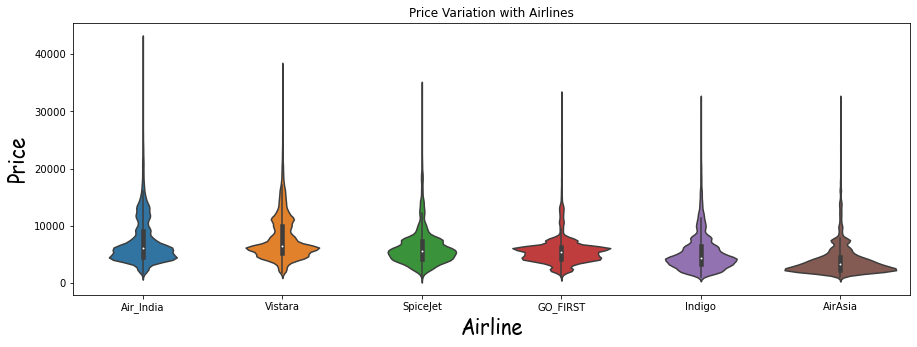

In [13]:
plt.figure(figsize=(15,5))
sns.violinplot(x='airline', y='price', data = p.loc[p["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen")
plt.xlabel('Airline',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.ylabel('Price',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.title('Price Variation with Airlines')
plt.show()

#### Business Class


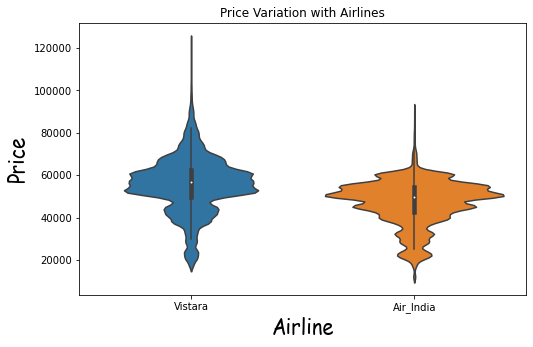

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(x='airline', y='price', data = p.loc[p["class"]=='Business'].sort_values("price", ascending = False), kind="boxen")
plt.xlabel('Airline',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.ylabel('Price',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.title('Price Variation with Airlines')
plt.show()

### Airlines with their number of passenger count

Vistara is most popular airline with maximum number of ticket bookings and Spicejet has lowest booked tickets

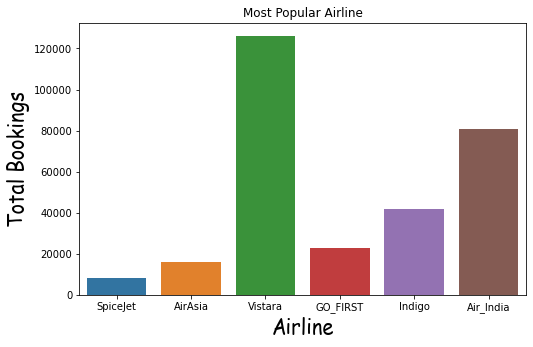

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline', data=p)
plt.title('Most Popular Airline')
plt.xlabel('Airline',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.ylabel('Total Bookings',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.show()

### Ratio of economy class vs business class tickets booked



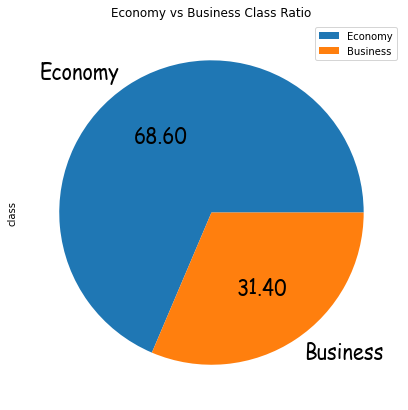

In [16]:
plt.figure(figsize=(15,7))
p['class'].value_counts().plot(kind='pie',textprops={'color':'black','fontsize':20,'fontname': 'Comic Sans MS'},autopct='%.2f',)
plt.title('Economy vs Business Class Ratio')
plt.legend(['Economy','Business'])
plt.show()

### Airline prices based on days left before buying the ticket

The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

<AxesSubplot:xlabel='days_left', ylabel='price'>

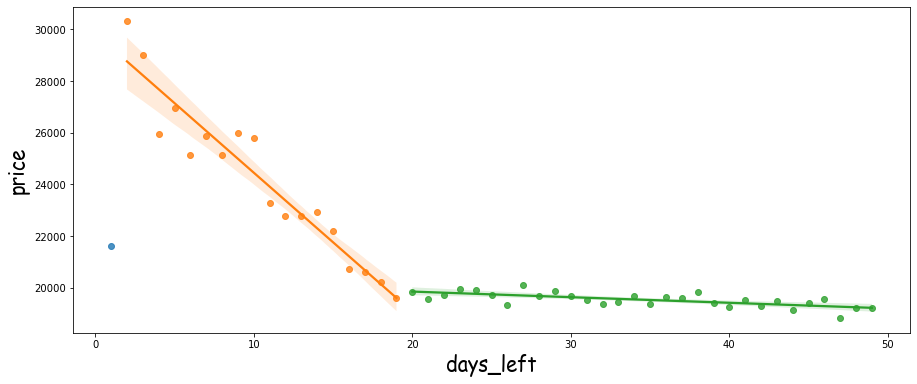

In [17]:
df_temp = p.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = plt.axes()
plt.xlabel('Days left',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.ylabel('Price',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

### Airline prices based on the departure and arrival time

As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

Text(0.5, 1.0, 'Airline prices based on the arrival time')

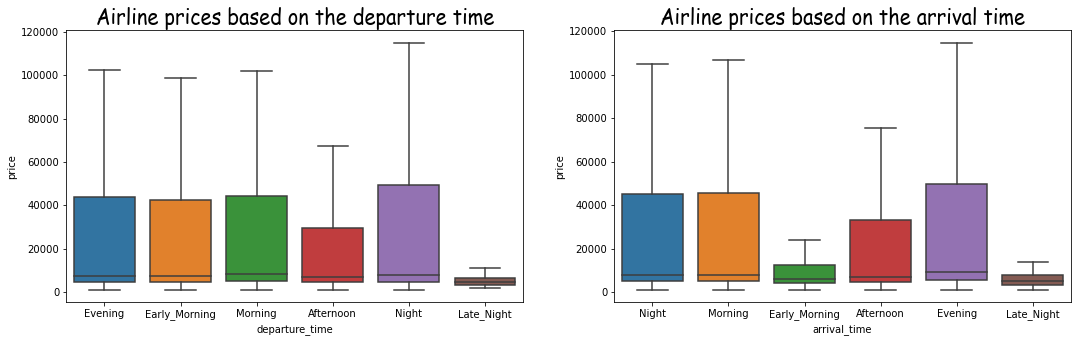

In [18]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=p, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=20, fontname= 'Comic Sans MS')
plt.subplot(1,2,2)
sns.boxplot(data=p, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=20, fontname= 'Comic Sans MS')

### Airline prices based on the source and destination

It can be said from below graph, Hydrabad TO Delhi flights are cheapest and Chennai TO Banglore flights are costliest.
It also seems that flight leaving from Delhi are often cheaper that from other source cities. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.


Text(0.5, 0.98, 'Price vs Source/Destination')

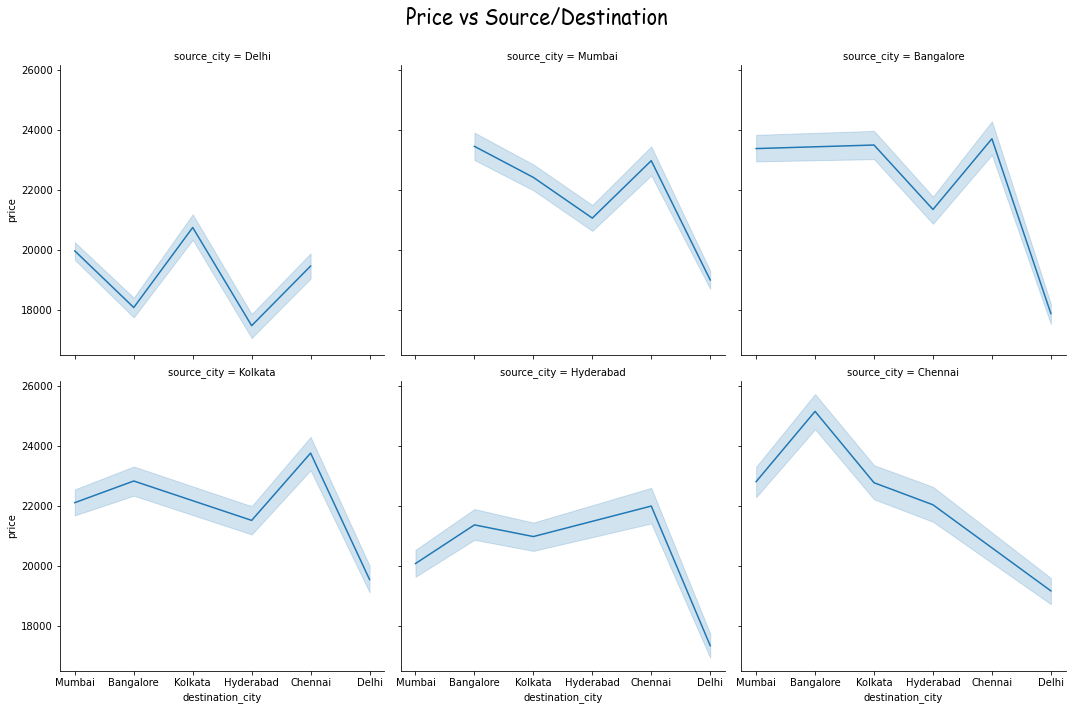

In [19]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=p, col_wrap=3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Price vs Source/Destination',fontsize=20, fontname= 'Comic Sans MS')

### Ticket price variation between economy and business class

In average business tickets are 6.5 times more expensive than economy tickets.

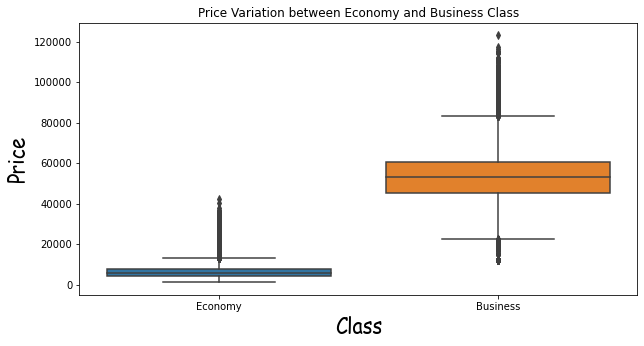

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='price', data=p)
plt.xlabel('Class',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.ylabel('Price',fontdict={'fontname': 'Comic Sans MS','fontsize':20})
plt.title('Price Variation between Economy and Business Class')
plt.show()

### Ticket price variation with the number of stops of the flight

It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

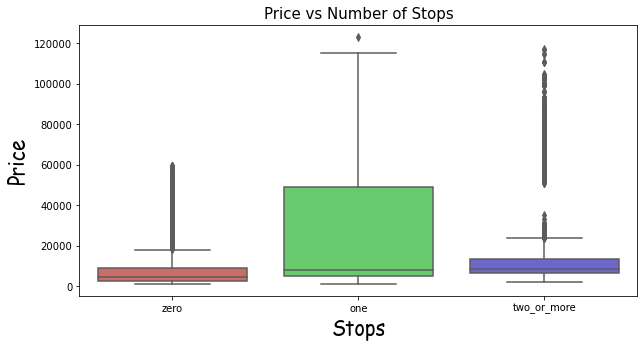

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=p,palette='hls')
plt.title('Price vs Number of Stops',fontsize=15)
plt.xlabel('Stops',fontsize=20, fontname= 'Comic Sans MS')
plt.ylabel('Price',fontsize=20, fontname= 'Comic Sans MS')
plt.show()

### Ticket price variation with the flight duration for both classes

It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

#### Economy class

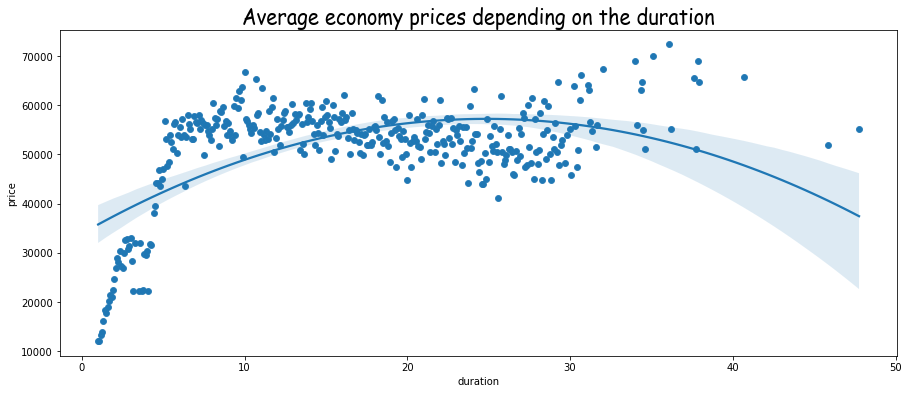

In [22]:
df_temp = p
df_temp = df_temp.drop(df_temp[df_temp['class'] == 'Economy'].index)
df_temp = df_temp.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average economy prices depending on the duration",fontsize=20, fontname= 'Comic Sans MS')
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

#### Business class

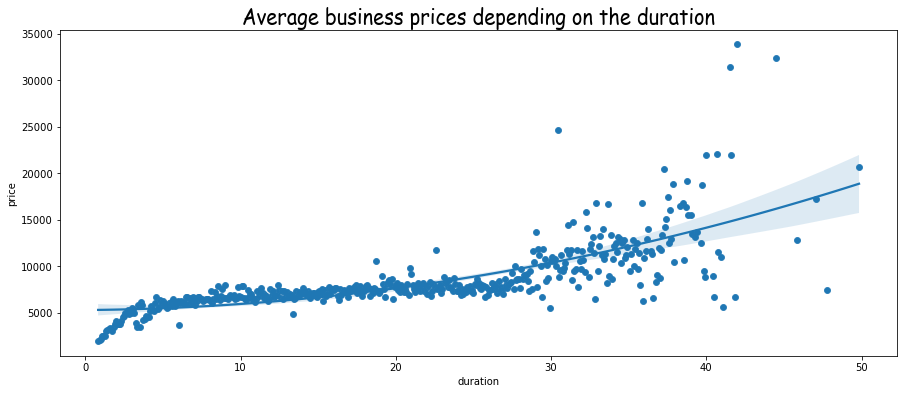

In [23]:
df_temp = p
df_temp = df_temp.drop(df_temp[df_temp['class'] == 'Business'].index)
df_temp = df_temp.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average business prices depending on the duration",fontsize=20, fontname= 'Comic Sans MS')
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:skyblue;
            font-size:75%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 10px;
              color:black;
              text-align:center;'>
        Machine Learning Implementation
    </h2>
    </div>

### Importing machine learning libraries

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Coverting labels into a numeric form using Label Encoder

In [25]:
l=LabelEncoder()

for col in p.columns:
    if p[col].dtype=='object':
        p[col]=l.fit_transform(p[col])

### Storing the dependent variables in X and independent variable in Y

In [26]:
X = p.drop('price', axis=1)
y = p['price']

### Splitting the data into training set and testing set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((236588, 9), (59148, 9), (236588,), (59148,))

### Scaling the values to convert the int values to Machine Languages

In [28]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

### Creating objects of Regressor models

In [29]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('K Neighbors Regressor', KNeighborsRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor())
]

### Creating variables for storing values ahead

In [30]:
best_model = None
best_mse = float('inf')
best_r2 = -float('inf')

In [31]:
arr = {'Name':[],'Mse':[],'R2':[]}

### Using train and test data to calculate MSE & R2 score for all models

In [32]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    arr['Name'].append(str(name))
    arr['Mse'].append(mse)
    arr['R2'].append(r2)
    
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print('\n')
    
    if mse < best_mse and r2 > best_r2:
        best_model = model
        best_mse = mse
        best_r2 = r2


Model: Linear Regression
Mean Squared Error: 49278739.97251505
R2 Score: 0.9047066143906439


Model: Gradient Boosting Regressor
Mean Squared Error: 25580815.7697335
R2 Score: 0.9505327745249429


Model: K Neighbors Regressor
Mean Squared Error: 16711661.592699667
R2 Score: 0.967683613395667


Model: Decision Tree Regressor
Mean Squared Error: 31347967.386185687
R2 Score: 0.9393804722712586


Model: Random Forest Regressor
Mean Squared Error: 21545866.720423963
R2 Score: 0.9583354081938316


Model: XGB Regressor
Mean Squared Error: 20180514.802563157
R2 Score: 0.9609756747037657




### Checking numbers to find best model

In [33]:
Results=pd.DataFrame(arr)
Results.head()

,Name,Mse,R2
0,Linear Regression,4.927874e+07,0.904707
1,Gradient Boosting Regressor,2.558082e+07,0.950533
2,K Neighbors Regressor,1.671166e+07,0.967684
3,Decision Tree Regressor,3.134797e+07,0.939380
4,Random Forest Regressor,2.154587e+07,0.958335


#### MSE using graph

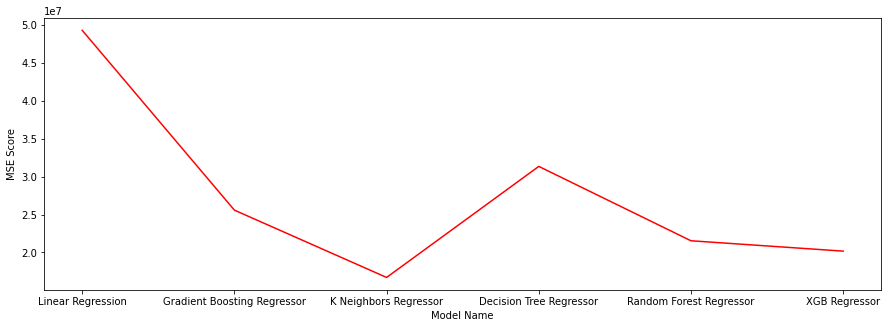

In [34]:
plt.figure(figsize=(15,5))
plt.plot(arr['Name'], arr['Mse'], color='red')
plt.xlabel("Model Name")
plt.ylabel("MSE Score")
plt.show()

#### R2 score using graph

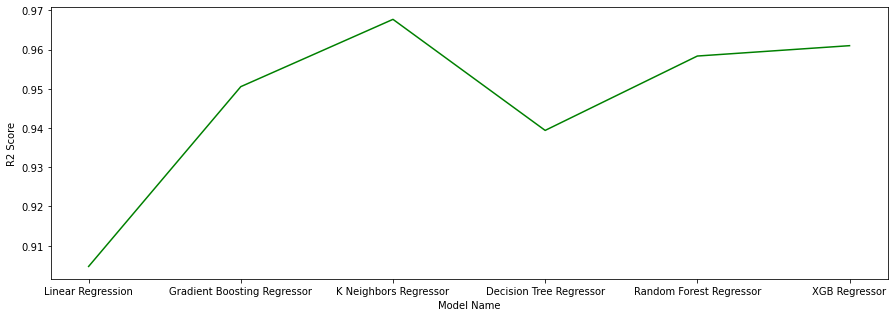

In [35]:
plt.figure(figsize=(15,5))
plt.plot(arr['Name'], arr['R2'], color='green')
plt.xlabel("Model Name")
plt.ylabel("R2 Score")
plt.show()

#### Finding accuracy of best model

In [36]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
score = (knn.score(X_test, y_test)*100)
score = round(score, 2)
print(score)

96.39


#### Concluding best model

In [37]:
print("From above analysis we can conclude that "+str(best_model)+" is the best model for this dataset to predict most accurate price with Lowest MSE and Highest R2 score. Accuracy reached by this model was "+str(score)+"%")

From above analysis we can conclude that KNeighborsRegressor() is the best model for this dataset to predict most accurate price with Lowest MSE and Highest R2 score. Accuracy reached by this model was 96.39%


### Saving the model

In [38]:
joblib.dump(best_model, 'BestModel.pkl')

['BestModel.pkl']